<a href="https://colab.research.google.com/github/lee-j-j/LJJ/blob/main/ex13_Simple_HELLO%ED%95%99%EC%8A%B5%ED%95%98%EA%B8%B0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
%cd /content/drive/MyDrive/Colab Notebooks/사물지능A

/content/drive/MyDrive/Colab Notebooks/사물지능A


In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### 목표
  - 가장 간단한 rnn 모델을 사용해보자
  - 과거 4개의 알파벳을 기억해서 다음에 등장할 알파벳을 예측하는 모델을 생성해보자
    - hell → o
    - appl → e
    - hello, apple, lobby, daddy, hobby

In [4]:
# h, e, l, o, a, p, b, y, d → 9개의 특성
# 각 char를 원핫인코딩으로 수치화 시켜보기
h = [1,0,0,0,0,0,0,0,0]
e = [0,1,0,0,0,0,0,0,0]
l = [0,0,1,0,0,0,0,0,0]
o = [0,0,0,1,0,0,0,0,0]
a = [0,0,0,0,1,0,0,0,0]
p = [0,0,0,0,0,1,0,0,0]
b = [0,0,0,0,0,0,1,0,0]
y = [0,0,0,0,0,0,0,1,0]
d = [0,0,0,0,0,0,0,0,1]

# pd.get_dummies, tf.keras to_categorical


In [5]:
# X 문제 데이터 구성
# hell, appl, lobb, dadd, hobb
X = np.array([[h,e,l,l],
              [a,p,l,l],
              [l,o,b,b],
              [d,a,d,d],
              [h,o,b,b]])
X

# 모델이 문자를 이해하려면 수치화, 토큰화

array([[[1, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 1, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 1, 0, 0, 0, 0, 0, 0],
        [0, 0, 1, 0, 0, 0, 0, 0, 0]],

       [[0, 0, 0, 0, 1, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 1, 0, 0, 0],
        [0, 0, 1, 0, 0, 0, 0, 0, 0],
        [0, 0, 1, 0, 0, 0, 0, 0, 0]],

       [[0, 0, 1, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 1, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 1, 0, 0],
        [0, 0, 0, 0, 0, 0, 1, 0, 0]],

       [[0, 0, 0, 0, 0, 0, 0, 0, 1],
        [0, 0, 0, 0, 1, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 1],
        [0, 0, 0, 0, 0, 0, 0, 0, 1]],

       [[1, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 1, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 1, 0, 0],
        [0, 0, 0, 0, 0, 0, 1, 0, 0]]])

In [6]:
# y 데이터 생성
# 다중분류 셋팅
# 알파벳의 개수는 몇개로 이루어져있을까? 9개
y = np.array([o,e,y,y,y,])
y

array([[0, 0, 0, 1, 0, 0, 0, 0, 0],
       [0, 1, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 1, 0],
       [0, 0, 0, 0, 0, 0, 0, 1, 0],
       [0, 0, 0, 0, 0, 0, 0, 1, 0]])

In [7]:
# 크기확인
# X, y
# (5, 4, 9) → (samples, timesteps, features)
print('문제 데이터 : ', X.shape)
print('문제1 크기 : ', X[0].shape) # 4 → 단어를 이루고 있는 알파벳 크기
print('문제 데이터 : ', y.shape)

문제 데이터 :  (5, 4, 9)
문제1 크기 :  (4, 9)
문제 데이터 :  (5, 9)


#### 모델링
  - SimpleRNN 모델 사용
  - RNN 층 + MLP층(다중분류)


In [8]:
# 모델 불러오기
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, SimpleRNN

In [9]:
# 모델 생성 - 뼈대 구축
rnn_model = Sequential()

# 입력층 + 중간층
# activation = 'tanh' 탄젠트하이퍼볼릭 (sigmoid와 비슷, 조금 더 긴 형태, SimpleRNN의 활성화함수 기본값)
# input_shape = (timesteps, features)
rnn_model.add(SimpleRNN(2, input_shape = (4,9)))

# 출력층 - 다중분류
# 유닛 = 클래스 개수만큼, 활성화 = 'softmax'
rnn_model.add(Dense(9, activation='softmax'))

# 모델 요약
rnn_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn (SimpleRNN)      (None, 2)                 24        
                                                                 
 dense (Dense)               (None, 9)                 27        
                                                                 
Total params: 51 (204.00 Byte)
Trainable params: 51 (204.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [10]:
# 컴파일 - 다중분류
# loss, optimizer, metrics
rnn_model.compile(loss = 'categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [11]:
# 학습
# 문제, 답, 반복횟수 1000
# 학습현황 h 변수에 담기

h1 = rnn_model.fit(X, y, epochs=1000)

Epoch 1/1000
1/1 [==============================] - 7s 7s/step - loss: 2.1708 - accuracy: 0.2000
Epoch 2/1000
1/1 [==============================] - 0s 31ms/step - loss: 2.1675 - accuracy: 0.2000
Epoch 3/1000
1/1 [==============================] - 0s 17ms/step - loss: 2.1642 - accuracy: 0.2000
Epoch 4/1000
1/1 [==============================] - 0s 16ms/step - loss: 2.1608 - accuracy: 0.2000
Epoch 5/1000
1/1 [==============================] - 0s 18ms/step - loss: 2.1575 - accuracy: 0.2000
Epoch 6/1000
1/1 [==============================] - 0s 17ms/step - loss: 2.1542 - accuracy: 0.2000
Epoch 7/1000
1/1 [==============================] - 0s 28ms/step - loss: 2.1509 - accuracy: 0.2000
Epoch 8/1000
1/1 [==============================] - 0s 25ms/step - loss: 2.1476 - accuracy: 0.2000
Epoch 9/1000
1/1 [==============================] - 0s 30ms/step - loss: 2.1443 - accuracy: 0.2000
Epoch 10/1000
1/1 [==============================] - 0s 26ms/step - loss: 2.1410 - accuracy: 0.2000
Epoch 11/10

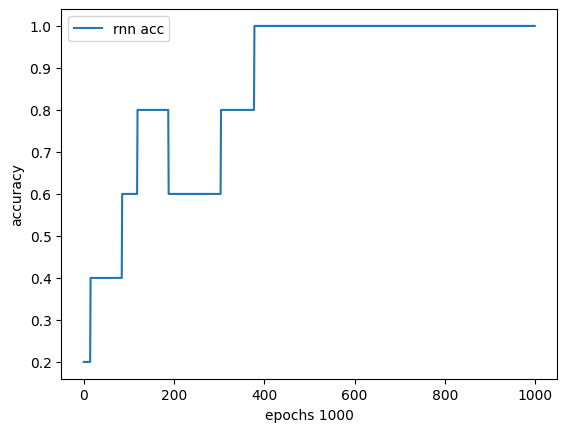

In [12]:
# accuracy 선 그래프 시각화

plt.plot(h1.history['accuracy'], label = 'rnn acc')
plt.legend()
plt.xlabel('epochs 1000')
plt.ylabel('accuracy')
plt.show()

In [23]:
# 예측
# h, e, l, l 문제 출제
X_test = np.array([[h,e,l,l]]) # 3차원
X_test.shape
class_names = ['h','e','l','o','a','p','b','y','d']

pred = rnn_model.predict(X_test)
pd.DataFrame(pred, columns = class_names).T.sort_values(by = 0, ascending = False)

1/1 [==============================] - 0s 20ms/step


,0
o,0.707291
y,0.101907
a,0.037970
d,0.034124
b,0.029281
l,0.028554
p,0.025935
e,0.018021
h,0.016917


In [24]:
# 확률 정보가 가장 큰 위치(인덱스) 출력 → np.argmax()
result_ind = np.argmax(pred) # 최대값이 있는 인덱스 번호 반환

# 알파벳 출력
class_names[result_ind]

'o'